Jonathan Sosa Uranga<br><br>
MDCgraphTest.ipynb
<br><br>
Peak Performance Data Analysis for Seasonal Performance

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from matplotlib.patches import Rectangle

from analysis import An
from teamsAnalysis import TeamAnalysis

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
#create object
volley = An('data/VVC.csv',2021,fall='08/26',winter='10/15',spring='2/1',summer='05/26')
volley.initialize()

/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:217: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  self.mean = self.fData.mean()
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:217: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.mean = self.fData.mean()
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:218: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.std = self.fData.std()


In [99]:
#obtain variables from the object to test the method 
ds = volley.fData
variables = volley.variables

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarni

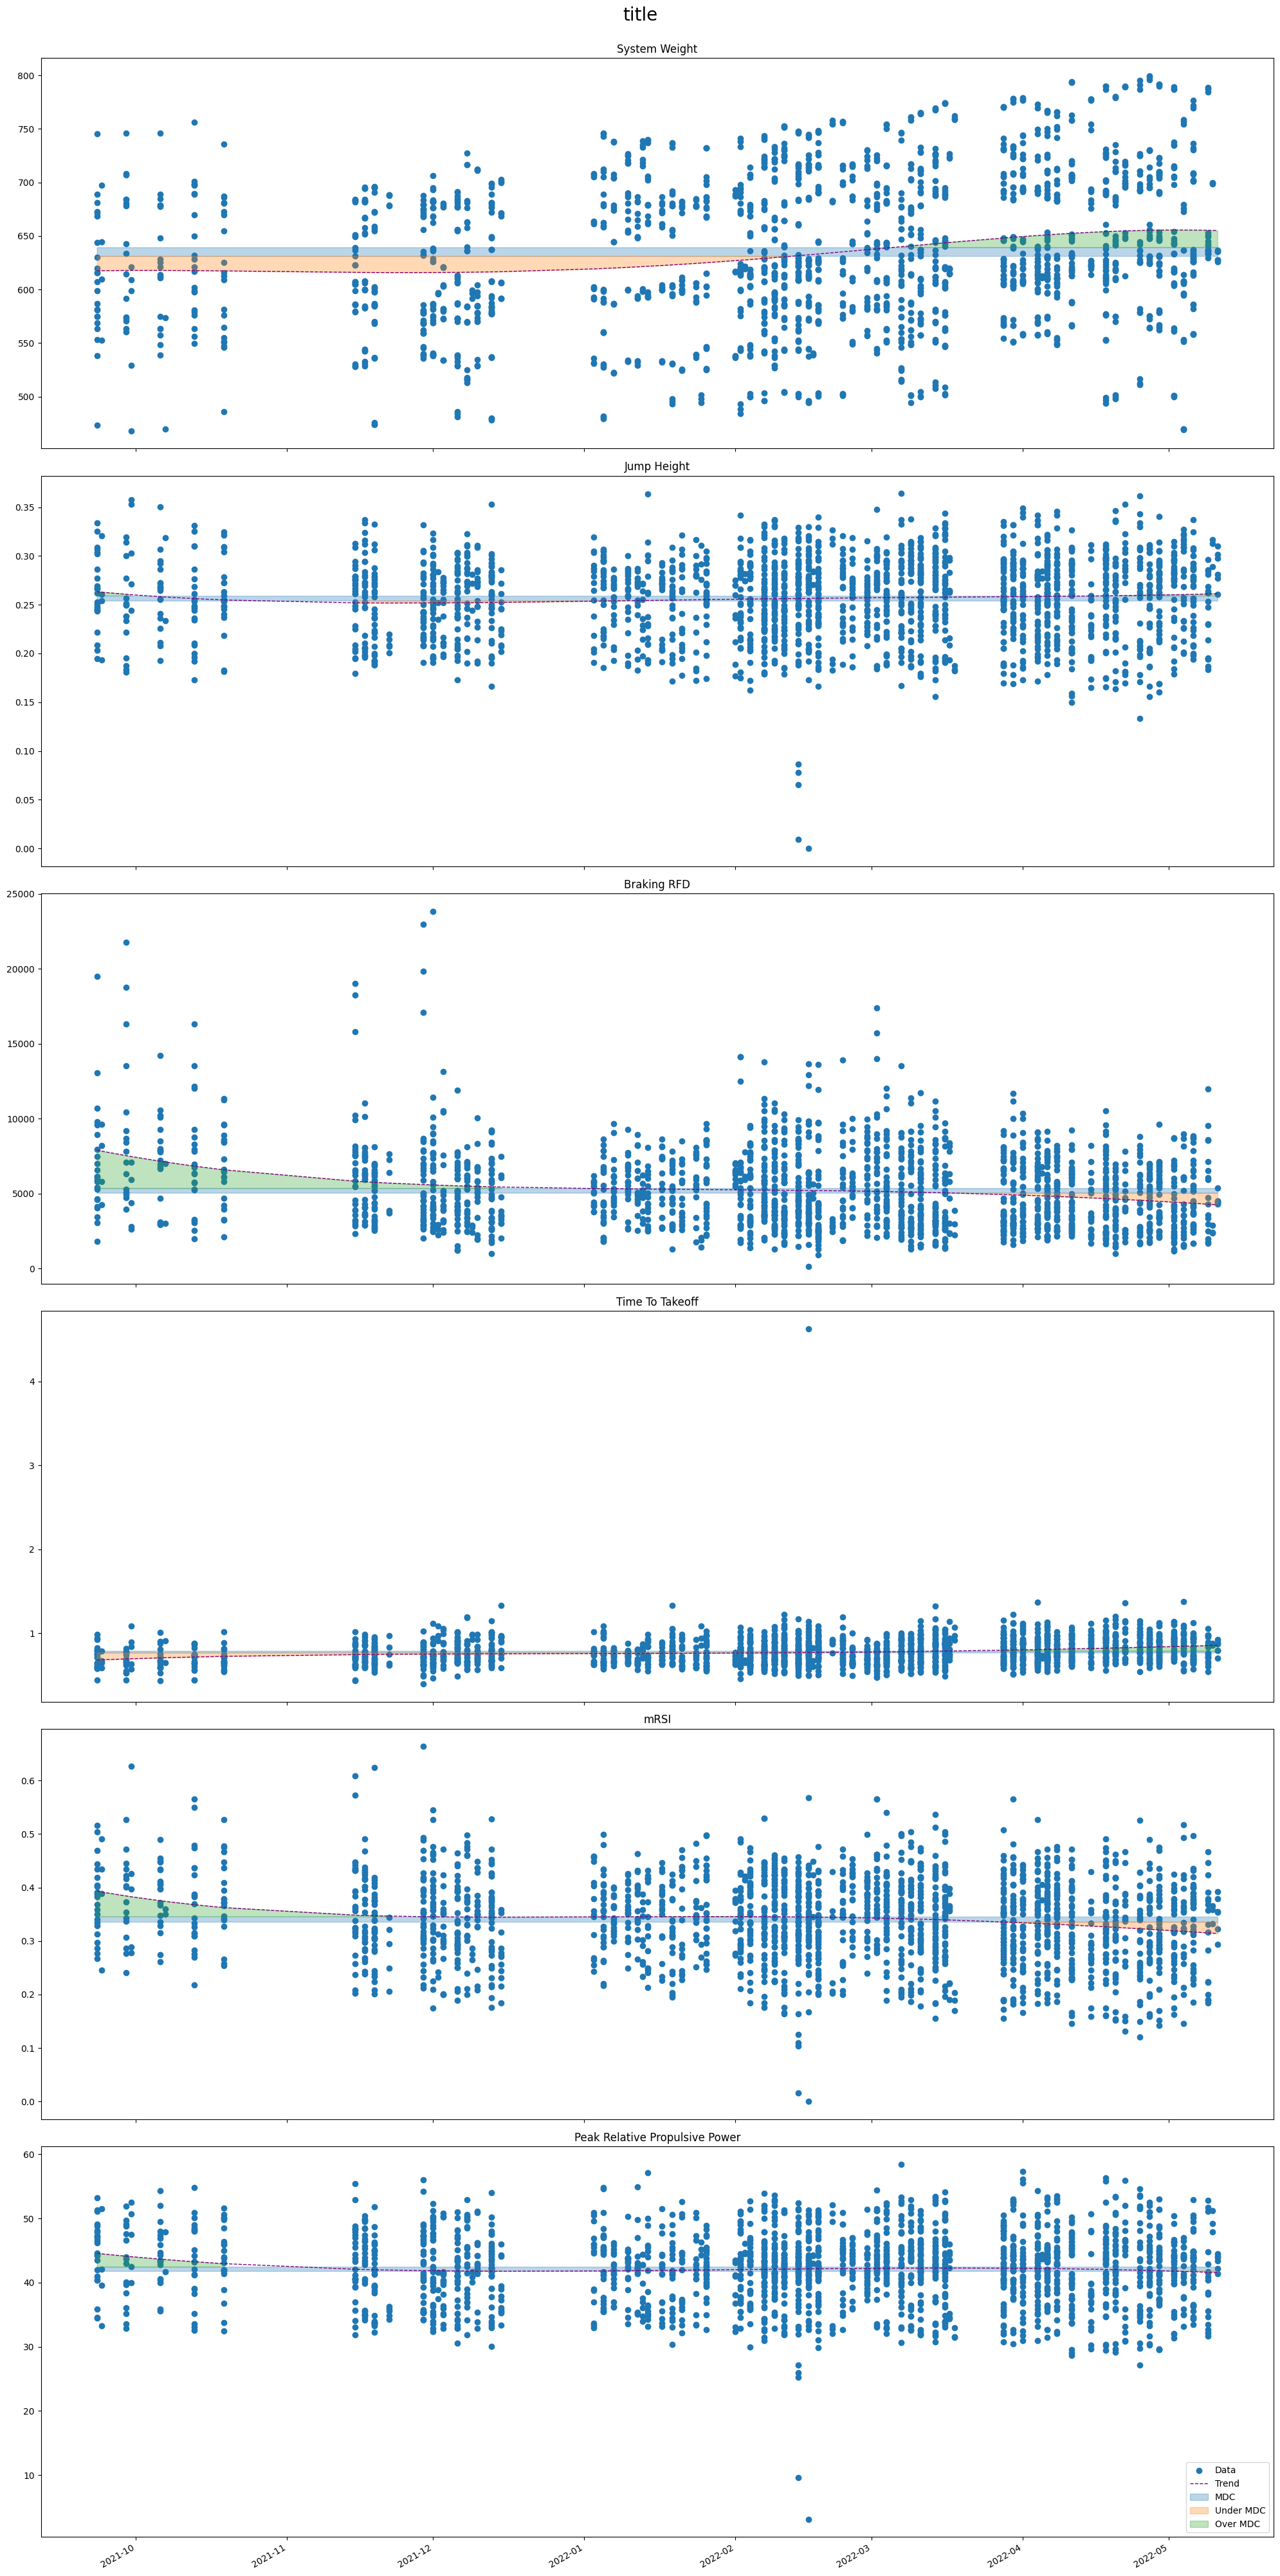

In [86]:
#test

dates = ds.loc[:,'Date']
#subplots
fig, axs = plt.subplots(len(variables), 1, figsize=(20, 40))
plt.subplots_adjust(hspace=0.8)

for i in range(len(variables)):

    #get the average of the variable
    avg = ds.loc[:,variables[i]].mean()
    mdc = volley.getMdcInd(ds.loc[:,variables[i]])

    #define the top and bottom bounds
    topMDC = avg + mdc
    botMDC = avg - mdc

    #scatterplot
    axs[i].set_title(variables[i])
    axs[i].scatter(dates,ds.loc[:,variables[i]])

    #linear regression
    s = ds.set_index('Date')[variables[i]]

    y = s
    x = (s.index - pd.Timestamp(0)).days.values
            
    #calculate equation for trendline
    z = np.polyfit(x, y, 10)
    p = np.poly1d(z)

    #add trendline to plot
    axs[i].plot(dates, p(x), color="purple", linewidth=1, linestyle="--")

    #highlight area
    axs[i].fill_between(dates, topMDC, botMDC, color='C0', alpha=0.3)
    axs[i].fill_between(dates, p(x), botMDC, where=(p(x) < botMDC), color='C1', alpha=0.3)
    axs[i].fill_between(dates, topMDC, p(x), where=(p(x) > topMDC), color='C2', alpha=0.3)
    
           
#graph configuration
plt.suptitle("title", fontsize=20, y=1)
plt.legend(["Data", "Trend", "MDC", "Under MDC", "Over MDC"], loc ="lower right")
plt.gcf().autofmt_xdate()
fig.tight_layout()
plt.show()

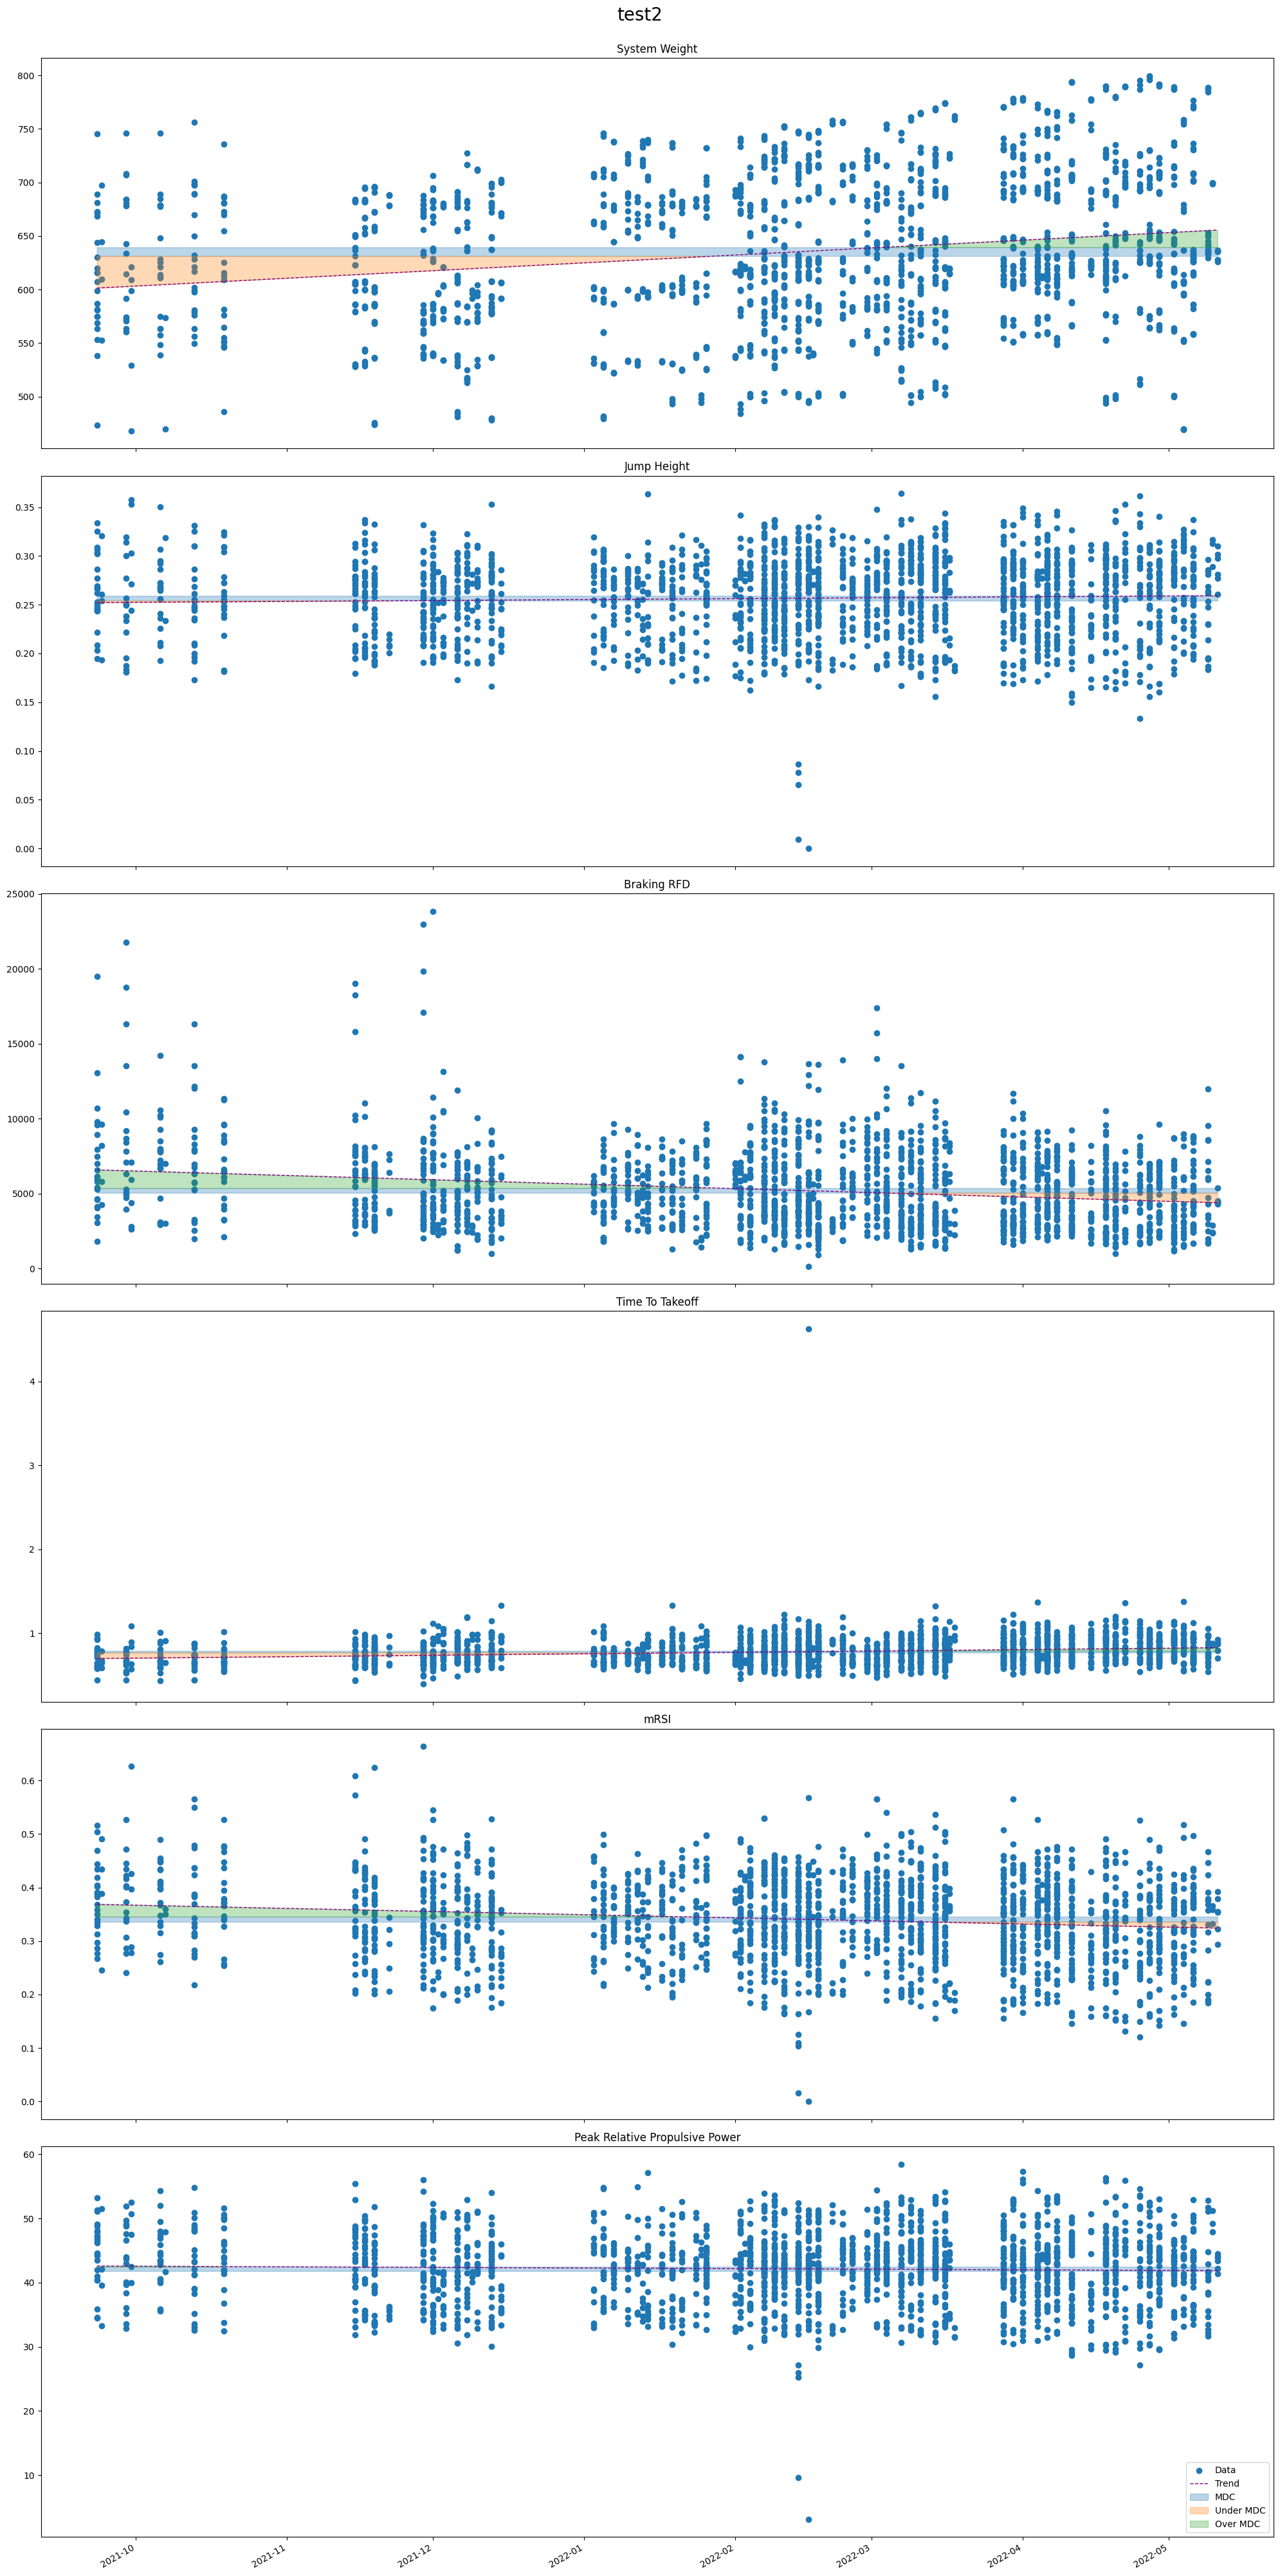

In [7]:
#test the function, should get the same graph
volley.varGraphsMDC(ds,"test2")

/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:217: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  self.mean = self.fData.mean()
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:217: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.mean = self.fData.mean()
/Users/jonnasosauranga/Desktop/PEAK Performance/analysis.py:218: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.std = self.fData.std()
/Library/Framewo

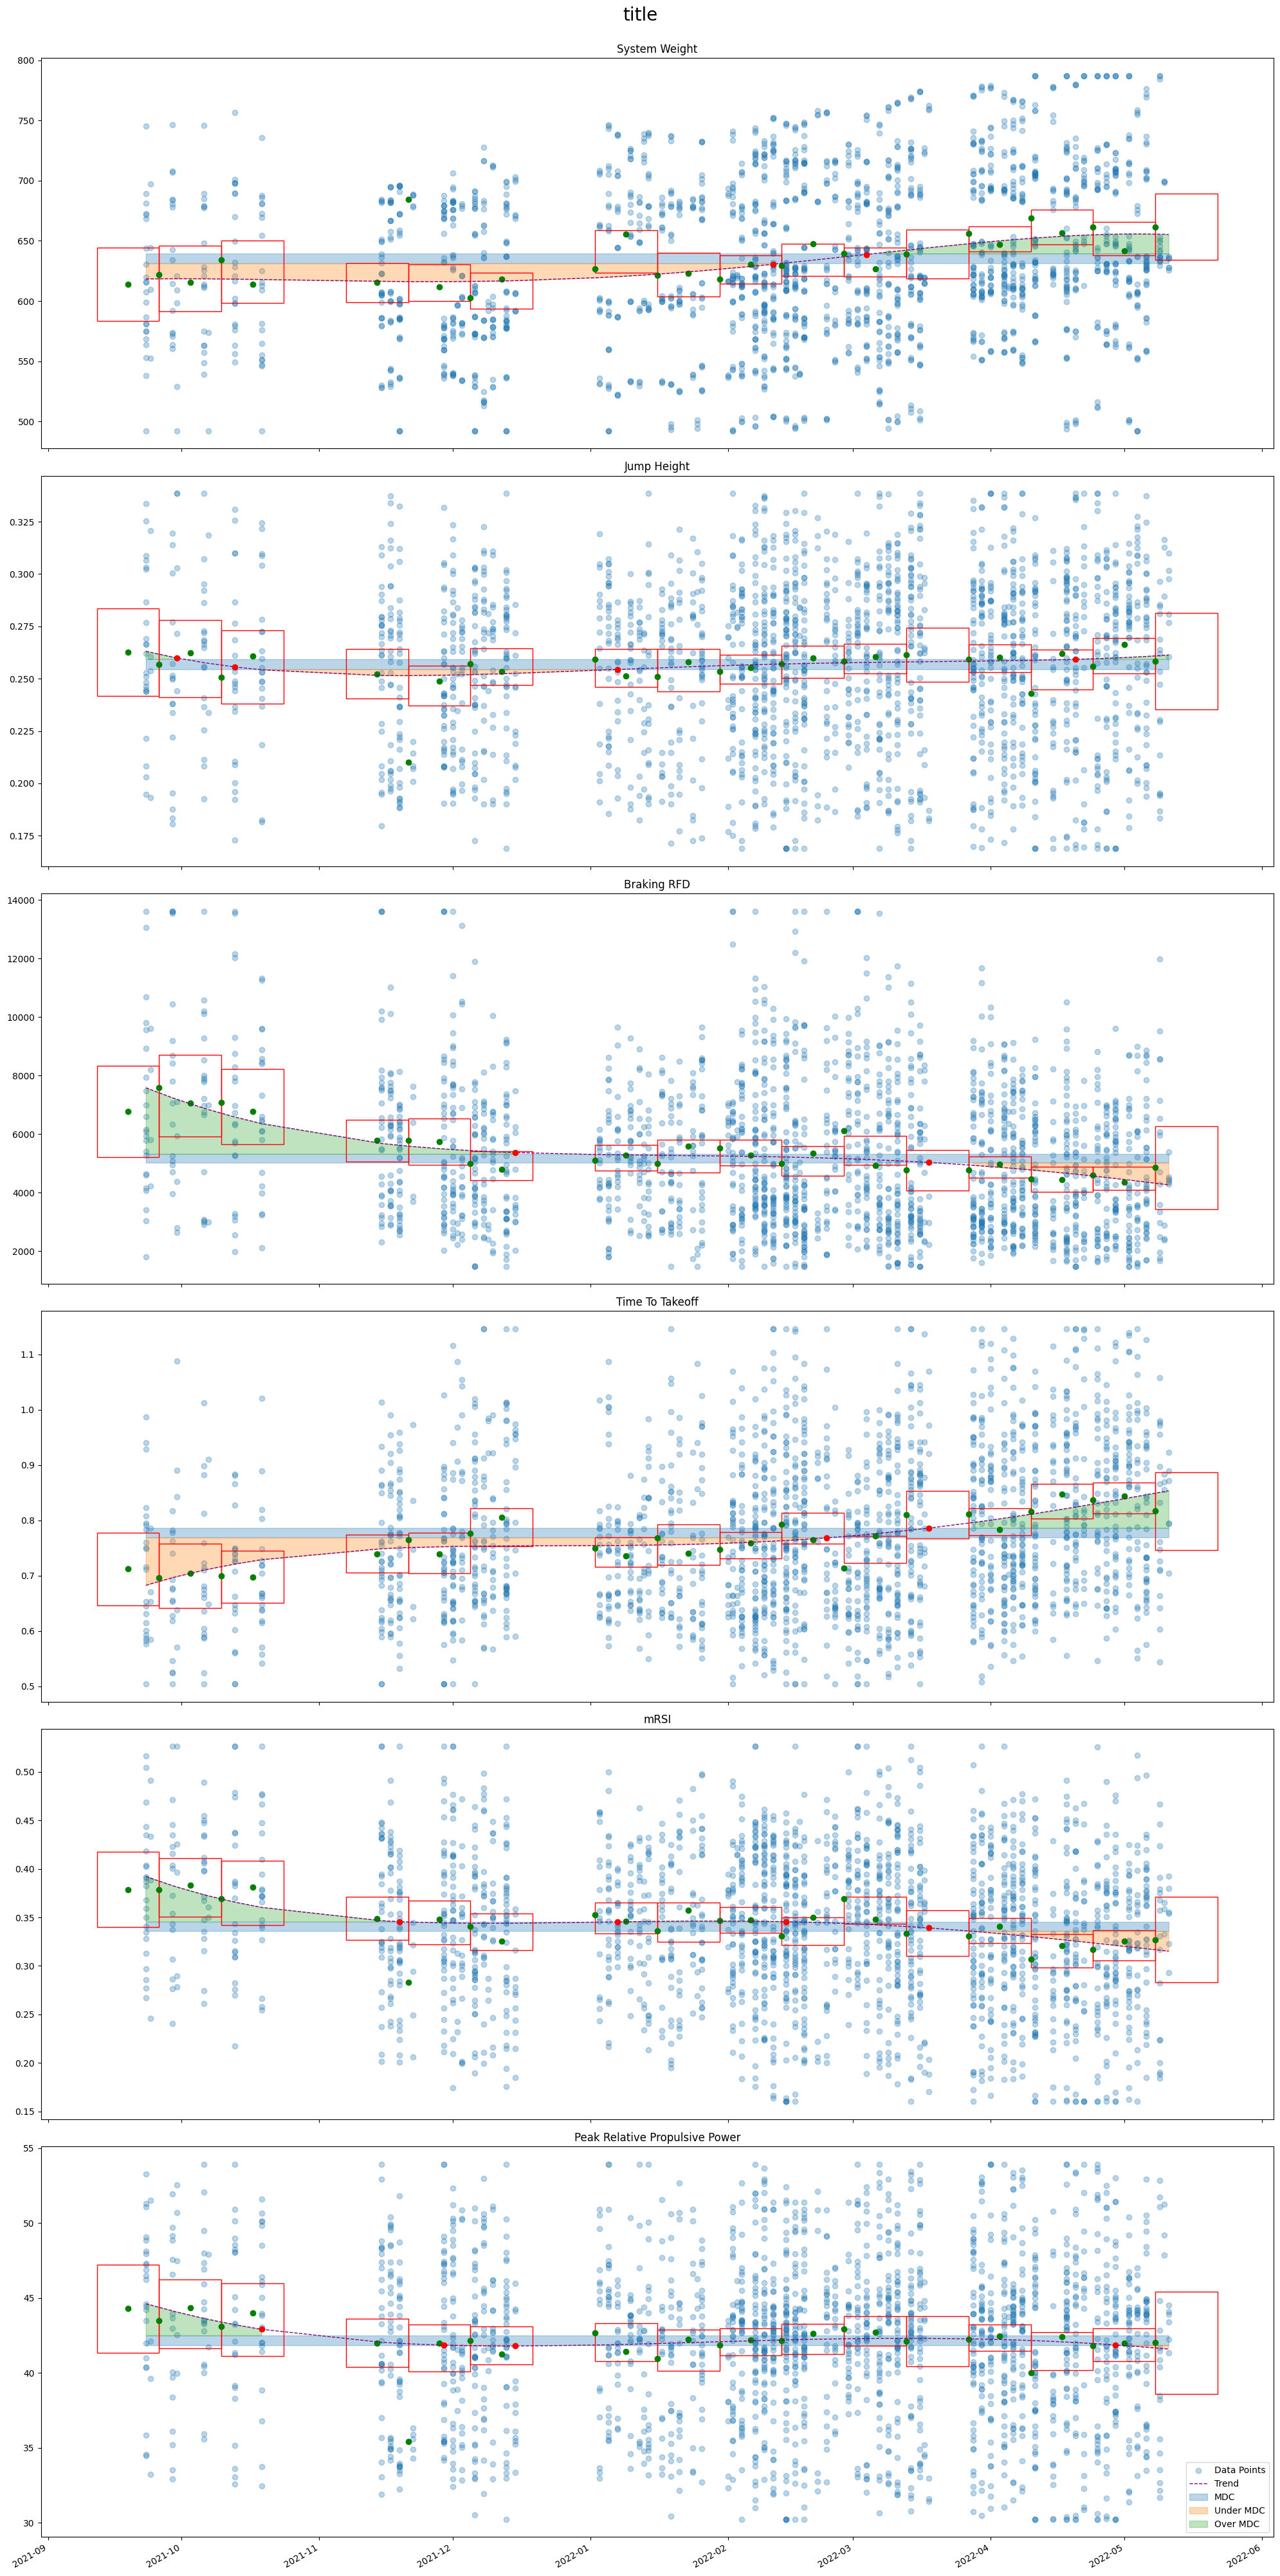

In [102]:
#test for step by step MDC

#create object
volley = An('data/VVC.csv',2021,fall='08/26',winter='10/15',spring='2/1',summer='05/26')
volley.initialize()

#obtain variables from the object to test the method 
ds = volley.fData
variables = volley.variables

#convert date column to datetime and subtract one week
ds['Date-2week'] = ds['Date'] - pd.to_timedelta(14, unit='d')

#calculate sum of values, grouped by week
week2 = ds.groupby([pd.Grouper(key='Date-2week', freq='2W')])

#convert date column to datetime and subtract one week
ds['Date-week'] = ds['Date'] - pd.to_timedelta(7, unit='d')

#calculate sum of values, grouped by week
week = ds.groupby([pd.Grouper(key='Date-week', freq='W')])

dates = ds.loc[:,'Date']
#subplots
fig, axs = plt.subplots(len(variables), 1, figsize=(20, 40))
plt.subplots_adjust(hspace=0.8)

for i in range(len(variables)):

    #get the average of the variable
    avg = ds.loc[:,variables[i]].mean()
    mdc = volley.getMdcInd(ds.loc[:,variables[i]])

    #define the top and bottom bounds
    topMDC = avg + mdc
    botMDC = avg - mdc

    #scatterplot
    axs[i].set_title(variables[i])
    axs[i].scatter(dates,ds.loc[:,variables[i]], label="Data Points", alpha=.3)

    #linear regression
    s = ds.set_index('Date')[variables[i]]

    y = s
    x = (s.index - pd.Timestamp(0)).days.values
            
    #calculate equation for trendline
    z = np.polyfit(x, y, 10)
    p = np.poly1d(z)

    #add trendline to plot
    axs[i].plot(dates, p(x), color="purple", linewidth=1, linestyle="--", label="Trend")

    #highlight area
    axs[i].fill_between(dates, topMDC, botMDC, color='C0', alpha=0.3, label='MDC')
    axs[i].fill_between(dates, p(x), botMDC, where=(p(x) < botMDC), color='C1', alpha=0.3, label='Under MDC')
    axs[i].fill_between(dates, topMDC, p(x), where=(p(x) > topMDC), color='C2', alpha=0.3, label='Over MDC')

    #intersection points
    trendY= p(x)

    #top MDC
    idx = np.argwhere(np.diff(np.sign(trendY - topMDC))).flatten()
    axs[i].plot(x[idx], trendY[idx], 'ro')

    #Bottom MDC
    idx = np.argwhere(np.diff(np.sign(trendY - botMDC))).flatten()
    axs[i].plot(x[idx], trendY[idx], 'ro')

    #MDC 2 week
    for wk, group in week2:
    
        #get the average of the variable
        avgWK = group.loc[:,variables[i]].mean()
        mdcWK = volley.getMdcInd(group.loc[:,variables[i]])

        #define the bottom bounds
        botMDCwk = avgWK - mdcWK

        axs[i].add_patch(Rectangle((wk, botMDCwk), pd.to_timedelta(14, unit='d'), (2*mdcWK),edgecolor='red',facecolor='none'))
    
    for wk, group in week:
        axs[i].scatter(wk,group.loc[:,variables[i]].mean(),color = 'green')

#graph configuration
plt.suptitle("title", fontsize=20, y=1)
plt.legend(loc ="lower right")
plt.gcf().autofmt_xdate()
fig.tight_layout()
plt.show()

remove anything outside the 
mean +- q1 and q2
keep the season 

add the fist week as the baseline

